# Patterns of Variation in Feature Spaces
This notebook corresponds to the case study 'Patterns of Variation in Feature Spaces' from the paper.

In [1]:
import model
import dataloader as dl
import numpy as np
import trainer
import parameters as p
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import torch


datasets = ['magic04'] # magic04
model_type = 'hinge_oco'

torch.manual_seed(p.random_state)
np.random.seed(p.random_state)


def experiment(cov_strength):
    p.cov_strength = cov_strength
    print("cov. strength set to " + str(cov_strength))
    # initialize the dicts for collecting results
    results = {}
    masks = {}
    occurrences = {}
    losses = {}
    errors = {}

    for dataset in datasets:
        results[dataset] = {}
        masks[dataset] = {}
        losses[dataset] = {}
        errors[dataset] = {}

        for scenario in p.scenarios:
            results[dataset][scenario] = 0
            masks[dataset][scenario] = []
            losses[dataset][scenario] = []
            errors[dataset][scenario] = []

    # run the experiments
    for scenario in p.scenarios:
        for dataset_name in datasets:
            Xpath, ypath = dl.get_path(dataset_name)
            X, y = dl.read_dataset(Xpath, ypath)
            num_features = len(X[0])
            m = p.models[model_type](num_features, p.learning_rate)
            fold_errors, fold_losses, fold_weights, fold_masks, error_lists = trainer.cross_validation(X, y, m, p.folds, p.scenarios[scenario])
            masks[dataset_name][scenario] = fold_masks
            losses[dataset_name][scenario] = fold_losses
            errors[dataset_name][scenario] = error_lists
            results[dataset_name][scenario] = np.mean(fold_errors)
            print(dataset_name, scenario, model_type, np.mean(fold_errors))
        print()
        
    return results, masks, losses, errors

In [2]:
results, masks, losses, errors = experiment(0.0)

cov. strength set to 0.0
magic04 varying_gaussian hinge_oco 0.4601871812398127

magic04 varying_gaussian +.25 hinge_oco 0.5153504390346496

magic04 varying_gaussian +.50 hinge_oco 0.5423918187076083

magic04 varying_gaussian +.75 hinge_oco 0.559919028340081

magic04 varying_uniform hinge_oco 0.32170724012829277

magic04 full hinge_oco 0.24147694410852308



In [7]:
# accumulating loss
# averages with sterr.

import pandas as pd
import seaborn as sns

data = []

# convert the dictionary of losses to a dataframe
    # columns: Scenario - timepoint - fold - value - dataset
for dataset_name in losses:
    for scenario in losses[dataset_name]:
        for fold in range(len(losses[dataset_name][scenario])):
            # calculate accumulating losses
            acc_loss = []
            acc_sum = 0
            
            for timepoint in range(len(losses[dataset_name][scenario][fold])):
                acc_sum += losses[dataset_name][scenario][fold][timepoint]
                acc_loss.append(acc_sum / float(timepoint + 1))
                
            for timepoint2 in range(len(losses[dataset_name][scenario][fold])):    
                value = acc_loss[timepoint2]
                if timepoint2 % 500 == 0:
                    row = [scenario, timepoint2, fold, dataset_name, value]
                    data.append(row)

df = pd.DataFrame(data, columns=['scenario', 'instance', 'fold', 'dataset', 'acc. loss'])



Text(0.5, 1.0, 'Accumulating Loss on Different Variation Patterns')

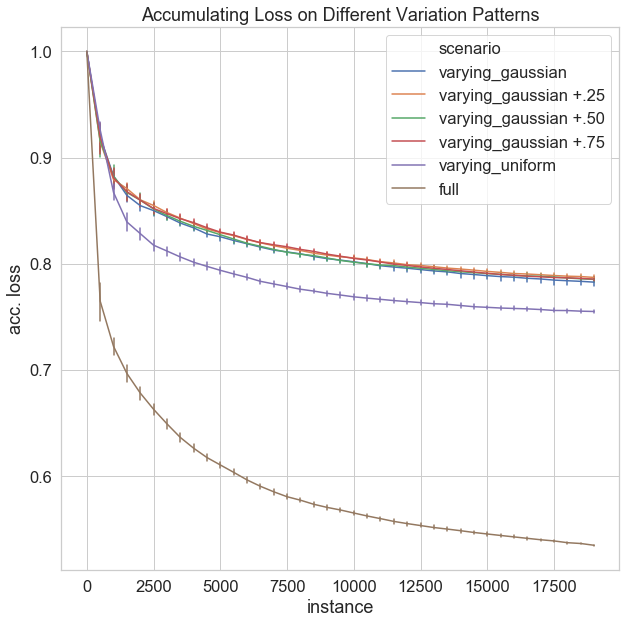

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.5)  # crazy big
#ax.set(yscale="log")
sns.set_style("whitegrid")
sns.lineplot(
    data=df, x="instance", y="acc. loss", hue="scenario", err_style="bars", ci=95, ax=ax
).set_title('Accumulating Loss on Different Variation Patterns')


In [19]:
# accumulating loss
# averages with sterr.

import pandas as pd
import seaborn as sns

data = []

# convert the dictionary of losses to a dataframe
    # columns: Scenario - timepoint - fold - value - dataset
for dataset_name in errors:
    for scenario in errors[dataset_name]:
        for fold in range(len(errors[dataset_name][scenario])):
            # calculate accumulating losses
            acc_loss = []
            acc_sum = 0
            
            for timepoint in range(len(errors[dataset_name][scenario][fold])):
                acc_sum += errors[dataset_name][scenario][fold][timepoint]
                acc_loss.append(acc_sum / float(timepoint + 1))
                
            for timepoint2 in range(len(errors[dataset_name][scenario][fold])):    
                value = acc_loss[timepoint2]
                if timepoint2 %  500 == 0:
                    row = [scenario, timepoint2, fold, dataset_name, value]
                    data.append(row)

df = pd.DataFrame(data, columns=['scenario', 'instance', 'fold', 'dataset', 'acc. error'])




Text(0.5, 1.0, 'Accumulating Error Rate on Different Variation Patterns')

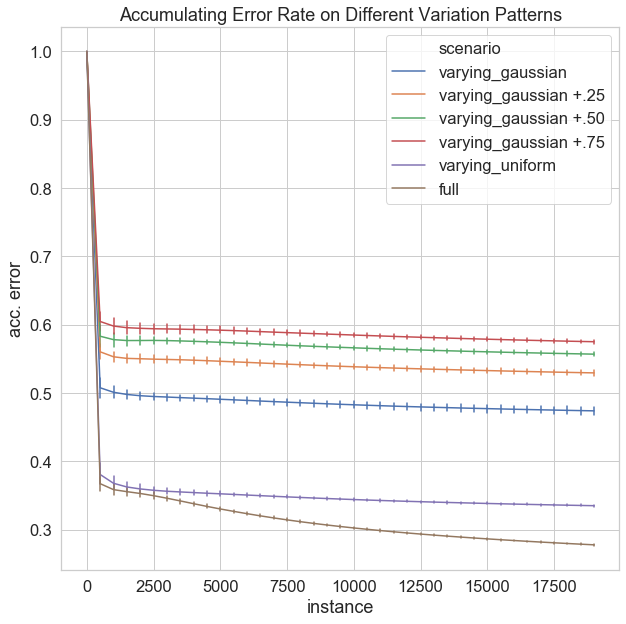

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.5)  # crazy big
#ax.set(yscale="log")
sns.set_style("whitegrid")

sns.lineplot(
    data=df, x="instance", y="acc. error", hue="scenario", err_style="bars", ci=95, ax=ax
).set_title('Accumulating Error Rate on Different Variation Patterns')

In [42]:
np.sum(masks['magic04']['varying_gaussian'])/380400
np.sum(masks['magic04']['varying_gaussian +.25'])/380400
np.sum(masks['magic04']['varying_gaussian +.50'])/380400
np.sum(masks['magic04']['varying_gaussian +.75'])/380400
np.sum(masks['magic04']['varying_uniform'])/380400

5.000028916929548

In [37]:
np.sum(masks['magic04']['full'])

3803800.0

In [32]:
masks['magic04'].keys()

dict_keys(['varying_gaussian', 'varying_gaussian +.25', 'varying_gaussian +.50', 'varying_gaussian +.75', 'varying_uniform', 'full'])

In [40]:
len(masks['magic04'])

6

In [41]:
19020 * 20

380400

In [43]:
np.sum(masks['magic04']['varying_gaussian'])/380400



4.990862250262881

In [44]:
np.sum(masks['magic04']['varying_gaussian +.25'])/380400



4.991606203995794

In [45]:
np.sum(masks['magic04']['varying_gaussian +.50'])/380400



5.004090431125132

In [46]:
np.sum(masks['magic04']['varying_gaussian +.75'])/380400



5.012823343848581

In [47]:
np.sum(masks['magic04']['varying_uniform'])/380400

5.000028916929548

In [49]:
np.sum(masks['magic04']['full'])/380400

9.999474237644584

In [61]:
np.mean(np.sum(masks['magic04']['varying_gaussian'][0], axis=1))
np.std(np.sum(masks['magic04']['varying_gaussian'][0], axis=1))

3.8871672867838525

In [62]:
np.std(np.sum(masks['magic04']['varying_gaussian +.25'][0], axis=1))


4.220158779985161

In [63]:
np.std(np.sum(masks['magic04']['varying_gaussian +.50'][0], axis=1))



4.379935525403683

In [64]:
np.std(np.sum(masks['magic04']['varying_gaussian +.75'][0], axis=1))




4.544371688660193

In [ ]:
np.std(np.sum(masks['magic04']['varying_gaussian +.75'][0], axis=1))

